<a href="https://colab.research.google.com/github/Nataliagm11/Integraci-n-de-Datos/blob/main/Caracterizaci%C3%B3n_VA_Clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caracterización Experimental de variables**

0. Cargar las librerias de trabajo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #Libreria para la gráfica de distribuciones

#Para la carga automatica de los datos
from google.colab import drive #Cargar datos desde drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se procede a la carga de datos

In [2]:
nxl = '/content/drive/MyDrive/Semestre 8/Prospectiva e Inetgración de datos/Data/3. FallasTecnologicas.xlsx'
XDB = pd.read_excel(nxl)
XDB.head(100)

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105
...,...,...,...,...,...
95,Semana 96,115,25.2722,1,1.3816
96,Semana 97,75,8.8613,6,1.2785
97,Semana 98,85,19.7139,1,0.6788
98,Semana 99,80,1.4179,3,14.7925


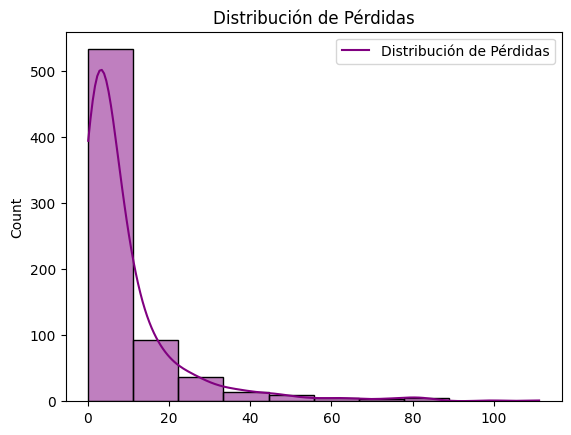

In [3]:
#Tomamos las variables de interes
Xev = XDB.iloc[:,3] #Variable de eventos semanales
Xsev = XDB.iloc[:,4] #Perdidas promedio por evento
LDA = np.multiply(Xev,Xsev)

#Graficamos la distribución de las pérdidas
plt.figure()
sns.histplot(LDA, kde = True, bins = 10, color= 'purple')  #Bins, quiere decir que estoy agrupando los datos en 10 intervalos
plt.title('Distribución de Pérdidas')
plt.legend(['Distribución de Pérdidas'])
plt.show()


2. Caracterización de la distribución de las pérdidas

In [4]:
counts,bin_edges = np.histogram(LDA, bins = 10)
print('Los datos por intervalos son:\n',counts)
print('Los limites de los intervalos son:\n',bin_edges)

Los datos por intervalos son:
 [533  93  37  14   9   5   3   5   1   1]
Los limites de los intervalos son:
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]


In [5]:
# Los valores centrales - marcas de clase
mc = (bin_edges[:-1] + bin_edges[1:])/2

#Limites inferiores bin_edges[:-1]
#Limites superiores bin_edges[1:]
print('Los valores centrales de las clases son:\n',mc)

Los valores centrales de las clases son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]


In [6]:
#Cuantos datos hay por intervalo
fp = counts/sum(counts)
print('Los datos por intervalos son:\n',fp)

Los datos por intervalos son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]


3. Se procede con el calculo de las medidas de tendencia central
Media, varianza, coeficiente de asimetria, kurtosis

In [7]:
#Media
u = np.sum(np.multiply(mc,fp))
print('La media es de los datos:\n',u)

La media es de los datos:
 11.07019634094151


In [8]:
# Varizanza
var = np.sum(np.multiply((mc-u)**2,fp))
print('La varianza es de los datos:\n',var)

La varianza es de los datos:
 170.14888945066892


In [9]:
# Desviación Estandar
std = np.sqrt(var)
print('La desviación estandar es de los datos:\n',std)

La desviación estandar es de los datos:
 13.044113210589247


In [10]:
#Coeficiente de asímetria
cas = np.sum(np.multiply(((mc-u)/std)**3,fp))
print('El coeficiente de asimetria es de los datos:\n',cas)

El coeficiente de asimetria es de los datos:
 3.58241551867726


In [11]:
#Curtosis
ck= np.sum(np.multiply(((mc-u)/std)**4,fp))
print('El coeficiente de curtosis es de los datos:\n',ck-3)

El coeficiente de curtosis es de los datos:
 15.266617247076208


En la base de datos se cuenta con un total de 701 registros de evento de pérdida, asociado con las operaciones a través de canales electronicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadisticos del 99% de acuerdo con la teoria de los percentiles. En la gráfica anterior, podemos observar que la distribución presenta una estructura de cola larga, esto promovido por un coeficiente de asimetría positivo, aproximadamente de 3.348, y un coeficiente de curtosis aproximadamente de 15 unidades, lo que indica que la mayoría de los datos se encuentran muy concentrados alrededor de la medida en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de pérdida extremos muy escasos, lo que indica una baja exposición al riesgo.

3. Se procede con el muestreo de la variable aleatoria de pérdidas

In [13]:
from scipy.stats import skew, kurtosis
#0. Preparar la variable para el muestreo
LDAdf = pd.DataFrame(LDA)

#1. Se procede con el muestreo
LDAs = LDAdf.sample(n=1000, replace= True)
casd = skew(LDAs)
print('El coeficiente de asimetria es de los datos:\n',casd)

ckd = kurtosis(LDAs)
print('El coeficiente de curtosis es de los datos:\n',ckd-3) # El exceso siempre es 3 y por eso se resta

El coeficiente de asimetria es de los datos:
 [3.31759297]
El coeficiente de curtosis es de los datos:
 [11.16198347]


La variación del coeficiente de asimetría es de:
 [0.0739229]
La variación del coeficiente de curtosis es de:
 [0.22470684]


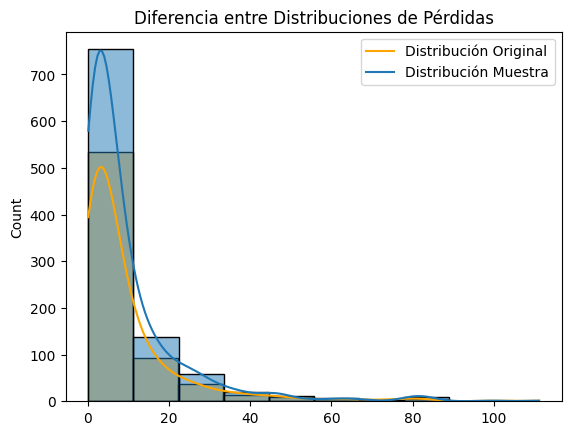

In [17]:
pvcas = ((cas-casd)/cas) # Variación del coeficiente de asimetría
print('La variación del coeficiente de asimetría es de:\n',pvcas)

pvk = ((ck-ckd)/ck) # Variación del coeficiente de curtosis
print('La variación del coeficiente de curtosis es de:\n',pvk)

#Se procede con la grafica de distribucion de las perdidas
plt.figure()
sns.histplot(LDA, kde = True, bins = 10, color= 'orange')
sns.histplot(LDAs, kde = True, bins = 10, color= 'lightblue')
plt.title('Diferencia entre Distribuciones de Pérdidas')
plt.legend(['Distribución Original','Distribución Muestra'])
plt.show()

4. Mapeo de la distribución de probabilidad

In [24]:
if abs(cas) < 0.5 and abs(ck) < 0.5:
  print('Posible distribución normal')
elif cas > 0 and abs(ck) > 3:
  if ck >=8:
    print('Posible distribución exponencial')
  elif ck >=6:
      print('Posible distribución gamma')
  else:
      print('Posible distribución Weibull')

elif cas < 0 and abs(ck) < 3:
  print('Posible distribución beta')
elif ck < 3:
  print('Posible distribución uniforme')
else:
  print('No es posible determinar la distribución')

Posible distribución exponencial


**Analisis de Resultados**

El número de datos disponible para este analisis fueron un total de 701, lo que lo ubica en una confiabilidad del 99%, para incrementar esta confiabilidad se procedio con un muestreo basado en el método de monte carlo (Giro de la ruleta- Cargada). Logrando en muchos casos, coeficientes de curtosis y coeficientes de asimetria por debajo del 5%, y coefciente de curtosis del 15%. A diferencia del método sampling que utiliza la libreria pandas, los cuales tuvieron variaciones mayores a estos porcentajes. El método monte carlo, asegura variaciones mucho mas bajas en estos coeficientes.